# Biblioteca

In [1]:
import pandas as pd
import sklearn
import numpy as np
import statsmodels 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style("whitegrid")
sns.set_palette("husl")

# Dados

In [3]:
dados = pd.read_csv("porto_seguro.csv")
dados.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Divisão entre treino e teste

In [4]:
from sklearn.model_selection import train_test_split
dados_treino, dados_teste = train_test_split(dados, random_state=37, test_size=0.3)

# Versão 1

### Previsão

In [5]:
X_treino = dados_treino.drop(["id", "target"], 1)
y_treino = np.array(dados_treino.target)

X_teste = dados_teste.drop(["id", "target"], 1)
y_teste = np.array(dados_teste.target)

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5)

### Resultados

In [7]:
from sklearn.metrics import roc_auc_score

result = model.fit(X_treino, y_treino)

auc = roc_auc_score(y_teste, result.predict_proba(X_teste)[:, 1])
print("AUC: %.4f" % auc)

AUC: 0.6183


Text(0.5,0,'Importância relativa')

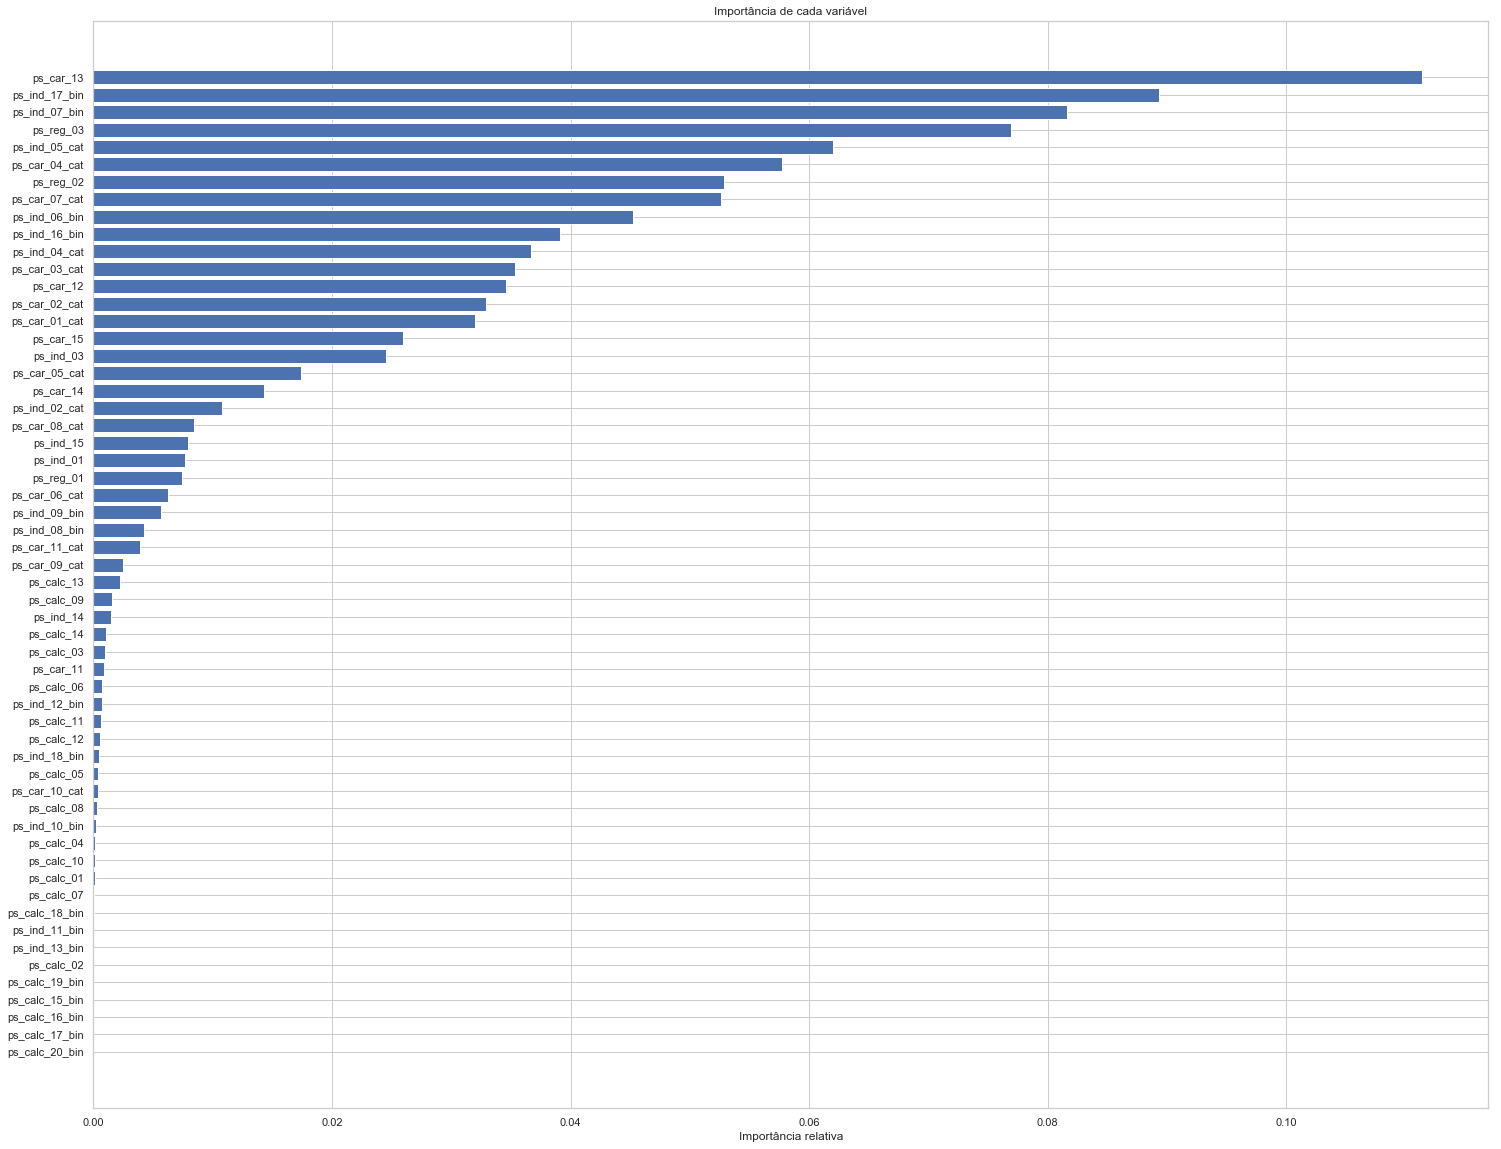

In [8]:
sns.set(rc={'figure.figsize':(25,20)})
sns.set_style("whitegrid")
sns.set_palette("husl")


importances = model.feature_importances_
indices = np.argsort(importances)
features = X_treino.columns

plt.figure(1)
plt.title('Importância de cada variável')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância relativa')

# Versão 2

### Previsão

In [9]:
X_treino = dados_treino.drop(["id", "target"], 1)
y_treino = np.array(dados_treino.target)

X_teste = dados_teste.drop(["id", "target"], 1)
y_teste = np.array(dados_teste.target)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parametros_tunados = [{'n_estimators': [50, 100],
                     'max_depth': [1,3],
                     'max_features': [10, 50]}]

model = GridSearchCV(RandomForestClassifier(), parametros_tunados, cv=3, scoring='roc_auc')

### Resultados

In [12]:
from sklearn.metrics import roc_auc_score

result = model.fit(X_treino, y_treino)

print("Parâmetros escolhidos:")
print()
print(model.best_params_)
print()
print("Grid scores:")
print()
media = model.cv_results_['mean_test_score']
desv_pad = model.cv_results_['std_test_score']
for media, desv_pad, params in zip(media, desv_pad, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (media, desv_pad * 2, params))
print()
auc = roc_auc_score(y_teste, result.predict_proba(X_teste)[:, 1])
print("AUC: %.4f" % auc)

Parâmetros escolhidos:

{'max_depth': 3, 'max_features': 10, 'n_estimators': 100}

Grid scores:

0.609 (+/-0.006) for {'max_depth': 1, 'max_features': 10, 'n_estimators': 50}
0.608 (+/-0.010) for {'max_depth': 1, 'max_features': 10, 'n_estimators': 100}
0.586 (+/-0.011) for {'max_depth': 1, 'max_features': 50, 'n_estimators': 50}
0.589 (+/-0.000) for {'max_depth': 1, 'max_features': 50, 'n_estimators': 100}
0.618 (+/-0.002) for {'max_depth': 3, 'max_features': 10, 'n_estimators': 50}
0.619 (+/-0.003) for {'max_depth': 3, 'max_features': 10, 'n_estimators': 100}
0.610 (+/-0.001) for {'max_depth': 3, 'max_features': 50, 'n_estimators': 50}
0.611 (+/-0.003) for {'max_depth': 3, 'max_features': 50, 'n_estimators': 100}

AUC: 0.6160


# Comentários